This challenge serves as final project for the **"How to win a data science competition"** Coursera course.

In this competition you will work with a challenging time-series dataset consisting of daily sales data, kindly provided by one of the largest Russian software firms - 1C Company. 

We are asking you to predict total sales for every product and store in the next month. By solving this competition you will be able to apply and enhance your data science skills.

**Lets we a look at our data**
Training data:
- 1. date - every date of items sold
- 2. date_block_num - this number given to every mounth
- 3. shop_id - unique number of every shop
- 4. item_id - unique number of every item
- 5. item_price - price of every item
- 6. item_cnt_day - number of items sold on a particular day

Testing data:
- 1. ID - unique for every pair
- 2. shop_id - unique number of every shop
- 3. item_id - unique number of every item

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Load the data

In [2]:
test = pd.read_csv('https://raw.githubusercontent.com/thembani47/predict-future-sales/main/Data/test.csv')
train = pd.read_csv('https://raw.githubusercontent.com/thembani47/predict-future-sales/main/Data/sales_train.csv')
items = pd.read_csv('https://raw.githubusercontent.com/thembani47/predict-future-sales/main/Data/items.csv')
shops = pd.read_csv('https://raw.githubusercontent.com/thembani47/predict-future-sales/main/Data/shops.csv')
sample_submission = pd.read_csv('https://raw.githubusercontent.com/thembani47/predict-future-sales/main/Data/sample_submission.csv')
categories = pd.read_csv('https://raw.githubusercontent.com/thembani47/predict-future-sales/main/Data/item_categories.csv')

# Exploratory Data Analysis

In [3]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [5]:
categories.head(3)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2


In [6]:
items.head(3)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40


In [7]:
shops.head(3)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2


In [8]:
train.shape

(2935849, 6)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [10]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [11]:
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [27]:
test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

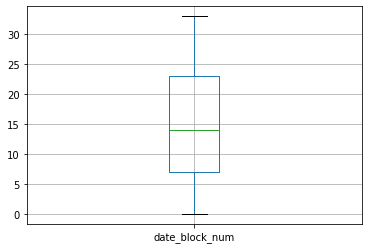

In [12]:
boxplot1 = train.boxplot(column=['date_block_num'])

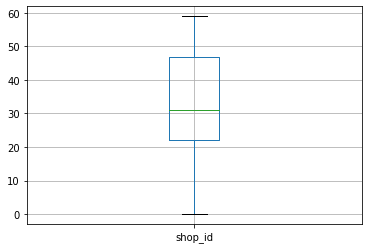

In [13]:
boxplot2 = train.boxplot(column=['shop_id'])

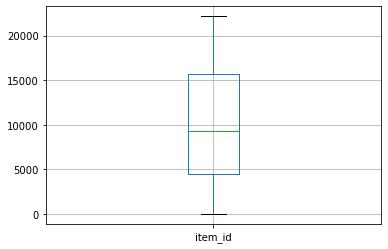

In [14]:
boxplot3 = train.boxplot(column=['item_id'])

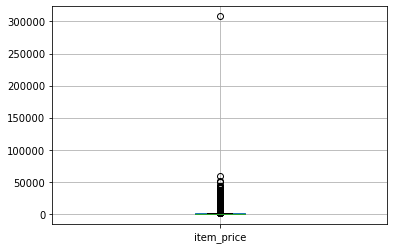

In [15]:
boxplot4 = train.boxplot(column=['item_price'])

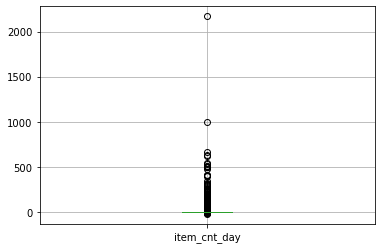

In [16]:
boxplot5 = train.boxplot(column=['item_cnt_day'])

In [17]:
train.skew()

C:\Users\F5469333\AppData\Local\Temp/ipykernel_12800/3574648760.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


date_block_num      0.203858
shop_id            -0.072361
item_id             0.257174
item_price         10.750423
item_cnt_day      272.833162
dtype: float64

In [18]:
train.kurtosis()

C:\Users\F5469333\AppData\Local\Temp/ipykernel_12800/1855142227.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.kurtosis()


date_block_num        -1.082869
shop_id               -1.025358
item_id               -1.225210
item_price           445.532826
item_cnt_day      177478.098774
dtype: float64

In [19]:
train.corr()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date_block_num,1.000000,0.019273,0.009356,0.095010,0.009402
shop_id,0.019273,1.000000,0.029396,-0.024034,-0.005230
item_id,0.009356,0.029396,1.000000,-0.134104,0.016650
item_price,0.095010,-0.024034,-0.134104,1.000000,0.011197
item_cnt_day,0.009402,-0.005230,0.016650,0.011197,1.000000


<AxesSubplot:>

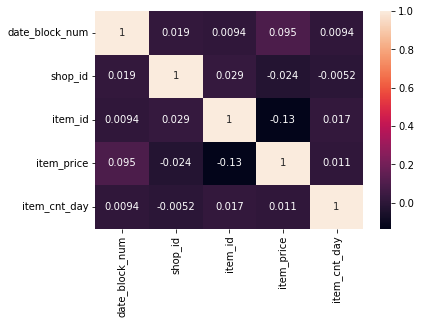

In [20]:
sns.heatmap(train.corr(),annot=True)

# Data Engineering

**Observations:**

- item_cnt_day has outliers
- item_price has outliers


In [21]:
outlier_columns = ['item_price', 'item_cnt_day']

for column in outlier_columns:
    
    mean = train[column].mean()
    std_dev = train[column].std()
    
    min_border = mean - std_dev * 3
    max_border = mean + std_dev * 3
    
    outliers = train[(train[column] < min_border) | (train[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")
    
    train.drop(outliers, inplace = True)

28701 outliers detected in column item_price
11749 outliers detected in column item_cnt_day


In [22]:
# check the rows where the item_price is negative
train[train['item_price']<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [23]:
#delete the row where the item price is negative
train.drop([train[train['item_price']<0].index[0]],inplace=True)

In [24]:
train[train['item_cnt_day']<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2933712,03.10.2015,33,25,14064,249.0,-1.0
2934243,26.10.2015,33,25,3917,449.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


These are data errors since we dealing with price and items sold per day

In [25]:
#replace the negative item cnt with 0 
train['item_cnt_day'].mask(train['item_cnt_day'] <0.0 ,0.0, inplace=True)

In [29]:
# Convert 'date' to date time
train['date'] = pd.to_datetime(train['date'],format='%d.%m.%Y')

C:\Users\F5469333\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\F5469333\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\F5469333\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\F5469333\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26.01.2013' in DD/MM/YYYY format. Provide form

In [30]:
# Create new features using 'date'
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['week'] = train['date'].dt.week

C:\Users\F5469333\AppData\Local\Temp/ipykernel_12800/440111036.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['week'] = train['date'].dt.week
